# Kaggle Competition:  Iceberg or Ship

# resnext50 architecture 

## start with image size of 75, increase epochs, update size recurrently


---
## Import libraries

In [1]:
!ls -l

total 4788
-rw-rw-r-- 1 ubuntu ubuntu 1405706 Jan 15 01:35 1b_getdata-csv.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  625023 Jan 14 18:47 1_getdata.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  245619 Jan 14 18:36 2_model_resnet34.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   13742 Jan 15 01:35 3_model_resnext50.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   14220 Jan 13 21:14 4_model_nasnet.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   64965 Jan 14 19:40 4_resnext_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  147078 Jan 14 19:57 5_resnet18_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  138629 Jan 14 19:52 6_resnext50_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  205624 Jan 15 02:37 7_1_resnext50_more_epoch_submitted.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  210001 Jan 15 18:51 7_2_resnext50_more_epoch.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  254485 Jan 20 19:36 7_5_resnext50_more_epoch_update_sz.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  246672 Jan 20 19:37 7_6_resnext50_more_epoch_update_sz.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  179449 Jan 14 21:28 7_resnext50_sz_100.ipynb
-rw-rw-r-

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
import shutil
from IPython.display import FileLink, FileLinks

from sklearn.model_selection import train_test_split
import helper

In [5]:
#PATH = "/home/nidhin/data/iceberg/"
PATH = os.path.expanduser("~/data/iceberg/")

In [6]:
!ls -l {PATH}

total 1973264
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan  9 00:38 models
-rw-rw-r--  1 ubuntu ubuntu     117951 Oct 23 17:27 sample_submission.csv
-rw-rw-r--  1 ubuntu ubuntu      38566 Jan  7 20:36 sample_submission.csv.7z
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan 15 14:20 sub
drwxrwxr-x  2 ubuntu ubuntu     274432 Jan 14 18:44 test
-rw-rw-r--  1 ubuntu ubuntu 1521771850 Oct 23 17:27 test.json
-rw-rw-r--  1 ubuntu ubuntu  257127394 Jan  7 20:36 test.json.7z
drwxrwxr-x 13 ubuntu ubuntu       4096 Jan 15 16:52 tmp
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 train
-rw-rw-r--  1 ubuntu ubuntu  196313674 Oct 23 17:23 train.json
-rw-rw-r--  1 ubuntu ubuntu   44932785 Jan  7 20:36 train.json.7z
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 valid


In [7]:
np.random.seed(0)

## Set Architecture

In [8]:
arch=resnext50
sz=75
bs=32
lr = 0.005

In [9]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.10)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

data = get_data(sz, bs)
data = data.resize(int(sz*1.1), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [10]:
#tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test',)

learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

### Learning Rate Finder

In [11]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 61%|██████    | 25/41 [00:00<00:00, 26.35it/s, loss=7.22] 


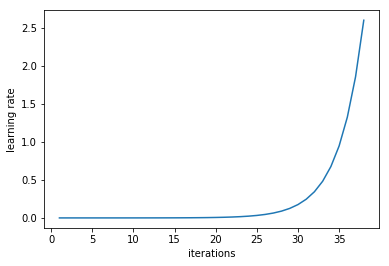

In [12]:
learn.sched.plot_lr()

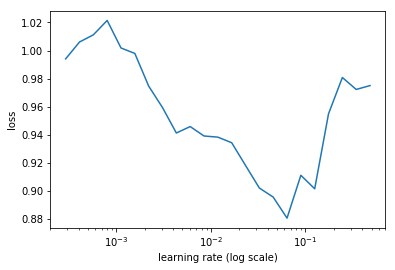

In [13]:
learn.sched.plot() 

In [14]:
learn.fit(lr, 9)
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

[0.      0.59825 0.47099 0.73296]                          
[1.      0.49927 0.40359 0.83239]                          
[2.      0.44379 0.40082 0.82386]                          
[3.      0.41769 0.42302 0.73864]                          
[4.      0.40847 0.41662 0.84091]                          
[5.      0.38639 0.39355 0.83239]                          
[6.      0.37098 0.38299 0.83523]                          
[7.      0.35066 0.37675 0.82954]                          
[8.      0.34772 0.39196 0.84091]                          



### Stochastic Gradient Descent with Restart

In [15]:
lr = 0.005

In [16]:
#learn.fit(lr, 4, cycle_len=2)
learn.fit(lr, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.50614 0.40619 0.81818]                          
[1.      0.46401 0.39647 0.81818]                          
[2.      0.43891 0.3963  0.80398]                          
[3.      0.46129 0.4569  0.77273]                          
[4.      0.43853 0.44168 0.79261]                          
[5.      0.43014 0.41541 0.78977]                          
[6.      0.41912 0.41718 0.78693]                          
[7.      0.41558 0.44    0.78125]                          
[8.      0.4464  0.45278 0.78125]                          
[9.      0.44    0.38377 0.81534]                          
[10.       0.41521  0.41193  0.80114]                      
[11.       0.40072  0.45434  0.76421]                      
[12.       0.40318  0.44622  0.78693]                      
[13.       0.4133   0.46559  0.77273]                      
[14.       0.43405  0.4363   0.78409]                      
[15.       0.43231  0.40133  0.80114]                      
[16.       0.44167  0.40873  0.8125 ]   

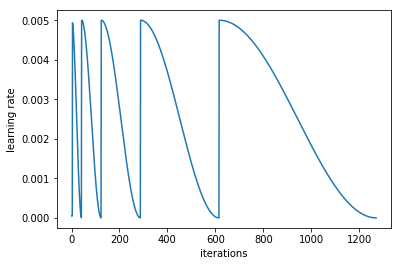

In [17]:
learn.sched.plot_lr()

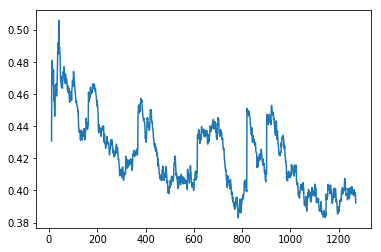

In [18]:
learn.sched.plot_loss()

In [19]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.3446784601138373, 0.8286604361370716)

In [20]:
# lr/10

In [21]:
# lr/9

In [22]:
# lr/3

In [23]:
# lr/4

### Unfreeze Layers

In [24]:
# unfreeze layers
learn.unfreeze()
#lrs = np.array([lr/15,lr/12,lr/9])
lrs = np.array([lr/9,lr/3,lr/1])

#wd = 0.025
#wds=[wd/100, wd/10, wd]
#wds=[0.0025,0.025,0.25]


### Run Learner Again

In [25]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2,use_wd_sched=True,wds=wds)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.555   0.46545 0.77557]                          
[1.      0.45294 0.45004 0.80682]                          
[2.      0.40165 0.34062 0.84943]                          
[3.      0.39021 0.45488 0.78977]                          
[4.      0.38996 0.32312 0.85227]                          
[5.      0.36741 0.43905 0.80966]                          
[6.      0.34174 0.35334 0.84375]                          
[7.      0.34827 0.67212 0.75284]                          
[8.      0.3414  0.44773 0.77273]                          
[9.      0.35447 0.8174  0.66761]                          
[10.       0.36961  0.3766   0.84659]                      
[11.       0.34214  0.40903  0.82102]                      
[12.       0.32158  0.34088  0.84091]                      
[13.       0.31974  0.3299   0.84943]                      
[14.       0.32591  0.3547   0.84375]                      
[15.       0.32594  0.42812  0.82954]                      
[16.       0.32818  0.33511  0.86932]   

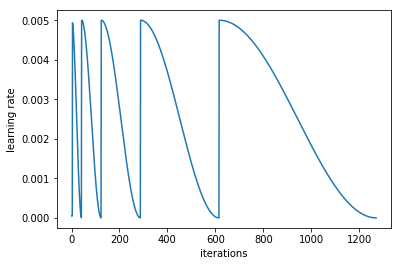

In [26]:
learn.sched.plot_lr()

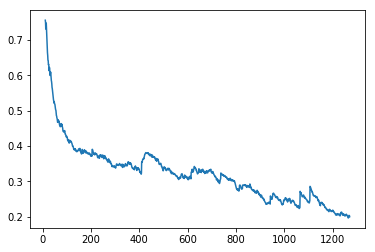

In [27]:
learn.sched.plot_loss()

## Log Loss | Accuracy

In [28]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2356822522004143, 0.9096573208722741)

## Resize the images

In [29]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.00)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

## Image Size of 128

In [30]:
#train for image size 128x128
learn.set_data(get_data(128, 32))

learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.39422 0.30824 0.86364]                          
[1.      0.33421 0.30572 0.86079]                          
[2.      0.3204  0.31164 0.86079]                          
[3.      0.30686 0.30337 0.85511]                          
[4.      0.30224 0.28447 0.86932]                          
[5.      0.31564 0.29473 0.85796]                          
[6.      0.30586 0.29179 0.85511]                          



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.37488 0.32175 0.83807]                          
[1.      0.41735 0.34574 0.83523]                          
[2.      0.38286 0.31647 0.85227]                          
[3.      0.39189 0.27023 0.86932]                          
[4.      0.37862 0.26703 0.89204]                          
[5.      0.32292 0.24683 0.89773]                          
[6.      0.31523 0.25111 0.89489]                          



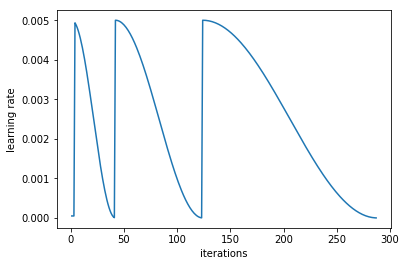

In [31]:
learn.sched.plot_lr()

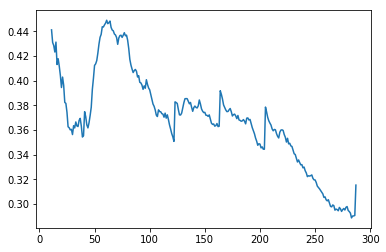

In [32]:
learn.sched.plot_loss()

## Log Loss | Accuracy

In [33]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.24905085270318444, 0.897196261682243)

---
## Image Size of 150

In [34]:
#train for image size 150 x 150
learn.set_data(get_data(150, 16))

learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.2788  0.28268 0.87798]                          
[1.      0.29462 0.29526 0.86905]                          
[2.      0.28896 0.28956 0.875  ]                          
[3.      0.28625 0.29952 0.87202]                          
[4.      0.29707 0.30062 0.86607]                          
[5.      0.2777  0.32601 0.86309]                          
[6.      0.263   0.32056 0.86607]                          



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.371   0.29715 0.88691]                          
[1.      0.38825 0.37787 0.83036]                          
[2.      0.31659 0.34464 0.83631]                          
[3.      0.38475 0.34366 0.85417]                          
[4.      0.37291 0.29999 0.875  ]                          
[5.      0.29536 0.29949 0.86905]                          
[6.      0.29284 0.29812 0.87798]                          



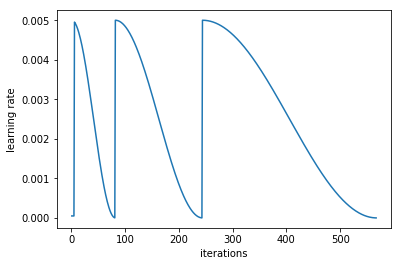

In [35]:
learn.sched.plot_lr()

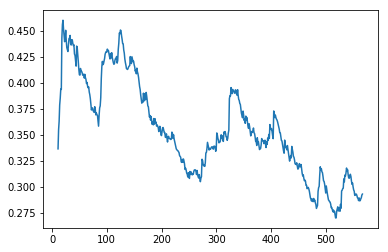

In [36]:
learn.sched.plot_loss()

## Log Loss | Accuracy

In [37]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.25082030876054084, 0.9034267912772586)

---
## Save learner

In [48]:
learn.save('resnext50_sz75_sequ')

In [49]:
learn.load('resnext50_sz75_sequ')

## Output predictions to csv file

In [50]:
helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz75_sequ.csv')

# END FILE

### Run Learner again

In [41]:
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

In [42]:
#learn.sched.plot_loss()

In [43]:
# log_preds,y = learn.TTA()
# preds = np.mean(np.exp(log_preds),axis=0)
# (metrics.log_loss(y,preds), accuracy(preds,y))

### Run Learner again

In [44]:
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

In [45]:
#learn.sched.plot_loss()

## Log Loss | Accuracy (final model here)

In [46]:
# log_preds,y = learn.TTA()
# preds = np.mean(np.exp(log_preds),axis=0)
# (metrics.log_loss(y,preds), accuracy(preds,y))

## Save predictions

In [47]:
# test_df = pd.read_json(PATH+"/test.json")
# helper.make_test_file(log_preds,test_df,model_name='resnext50_sz75_zm15_bs32_comp_band',
#                       classes=data.classes,
#                       submission_folder =f'{PATH}sub'
#                      )